# Plotting Math Functions 


$R^2 \rightarrow R$ 함수들의 그래프를 그리면 함수 동작을 이해하는데 도움이 된다. 
math visualization 자체는 흥미로운 주제로 프로그래머에게 특히 매력적으로 보인다. 

수학 시각화의 시작으로 함수 그리기부터 시작한다. 

## 기본

matplotlib.pyplot과 numpy로 시작한다. 데이터 분석에도 많이 쓰인다. 

https://medium.com/future-vision/plotting-equations-in-python-d0edd9f088c8

위의 내용을 시작으로 다른 것들도 많이 해보자

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 



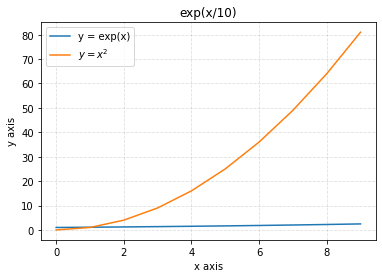

In [19]:
x = np.array(range(10))
ey = np.exp(x/10)
sy = x ** 2

plt.title('exp(x/10)')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.grid(alpha=.4, linestyle='--')

plt.plot(x, ey, label='y = exp(x)')
plt.plot(x, sy, label='$y = x^2$')  ## latex이 바로 지원된다. 

plt.legend() ## plot 뒤에 오고 plot의 label을 사용 
plt.show()

## 과제들 

* 3차원 그래프 
* 다양한 함수들 지정 

https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

axes에 그린다. scatter3D면 충분하다. 

In [20]:
from mpl_toolkits import mplot3d

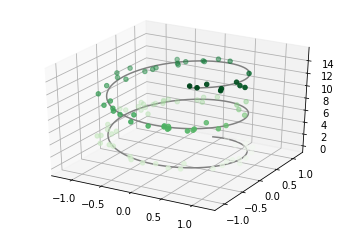

In [21]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

위 예제는 짧지만 매우 좋다. 

* linspace() 
* np.random.randn()
* ax.scatter3D()

numpy로 데이터를 만들고 axes로 출력한다. 그게 전부이다. 

https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

mplot3d로 더 많은 연습을 하고, 실제 수학 함수들에 적용한다. 

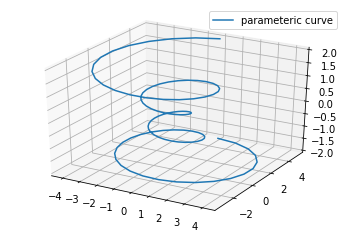

In [24]:
fig = plt.figure() 
ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z ** 2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, z, label='parameteric curve')
ax.legend()

plt.show()

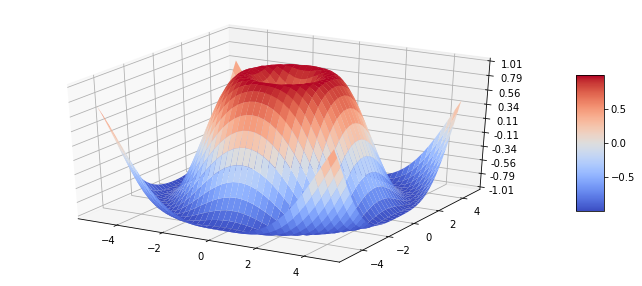

In [34]:
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm

fig = plt.figure(figsize=(12, 5)) 
ax = fig.gca(projection='3d')
x = np.arange(-5, 5, 0.25)
y = np.arange(-5, 5, 0.25)
x, y = np.meshgrid(x, y)
r = np.sqrt(x**2 + y**2) 
z = np.sin(r)

surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm)

ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## 코드 이해하기 

* plt.figure() 

 - 새로운 그림을 만들기 시작한다. 
 - figsize=(9, 9)와 같이 크기를 지정할 수 있다. 
 
* axes는 그려지는 공간이다.
 
 - axes = fig.add_subplot(1, 1, 1) 
 - axes = fig.gca(projection='3d') 
   - gca는 get_current_axes ? 정도인가? 
   
figure는 이미지 공간이고, axes는 그래프 공간이다.    
 
https://m.blog.naver.com/PostView.nhn?blogId=jung2381187&logNo=220408468960&proxyReferer=https:%2F%2Fwww.google.com%2F

위 문서도 은근 괜찮다. 

* axes.set_xlim([0., 1.])
* axes.set_ylim([-0.5, 2.5])
* axes.set_title("title", size=20)
* axes.set_xlabel("xAxis", size=10)
* axes.set_ylabel("yAxis")
* axes.plot(x, y, color='red', linewidth=3)
* axes.scatter(x, y, marker='^', color='darkgreen')

* matplotlib.cm도 괜찮다. 
  * surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm)
  * np.meshgrid() 함수와 위 plot_surface를 이해한다. 


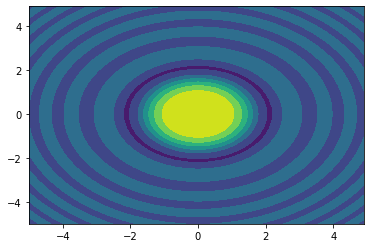

In [44]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
h = plt.contourf(x,y,z)
plt.show()

* np.meshgrid(x, y) 함수는 MATLAB에 있는 mesh 명령과 같다. 
  * n 길이의 배열을 nxn 행렬로 변환한다 
  * 정방 행렬로 변환해두면 행렬 연산, 행렬과 벡터 연산을 처리할 수 있다. 
* plt.contourf() 나 axes.plot_surface() 에서 어떻게 사용하는 지 알아야 한다 

이제 연습을 통해 기억하고 활용할 수 있게 한다. 

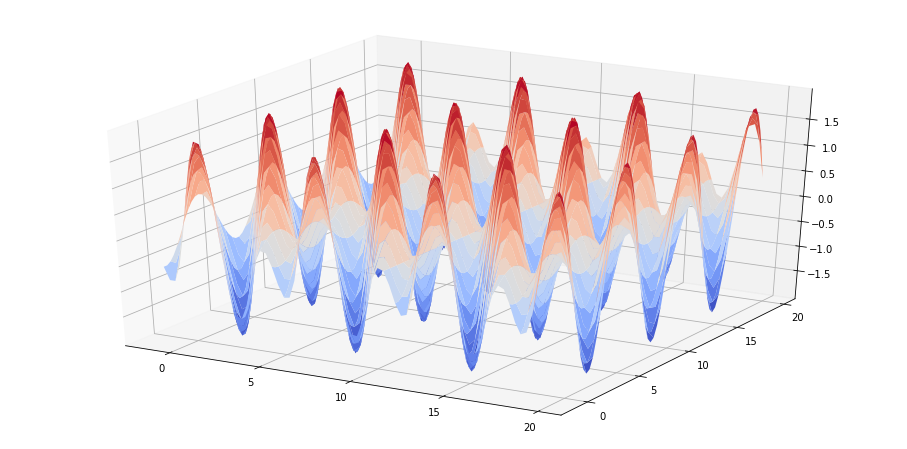

In [79]:
fig = plt.figure(figsize=(16, 8)) 
ax = fig.gca(projection='3d')

x = np.arange(-1, 20, 0.3)
y = np.arange(-1, 20, 0.3)
mx, my = np.meshgrid(x, y, sparse=True)
z = np.cos(mx + my) + np.sin(2*mx + my)

ax.plot_surface(mx, my, z, cmap='coolwarm')
plt.show()

이해했다. 

* plot_surface의 입력은 2D 배열이다. 
  * 이 배열에서 샘플링 해서 (rstride / cstride) x, y, z 값으로 그림 
  

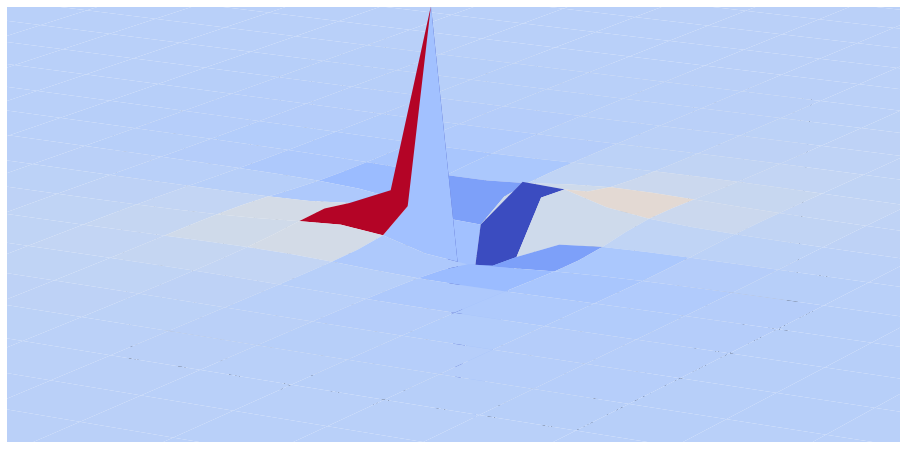

In [99]:
fig = plt.figure(figsize=(16, 8)) 
ax = fig.gca(projection='3d')

x = np.arange(-5.3, 5, 0.2)
y = np.arange(-5.3, 5, 0.2)
mx, my = np.meshgrid(x, y, sparse=True)
z = 2*mx*my / (mx**2 + my**2)**2

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-25, 25])

ax.plot_surface(mx, my, z, cmap='coolwarm')
plt.show()